In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [16]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [17]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


<Axes: xlabel='Gene One', ylabel='Gene Two'>

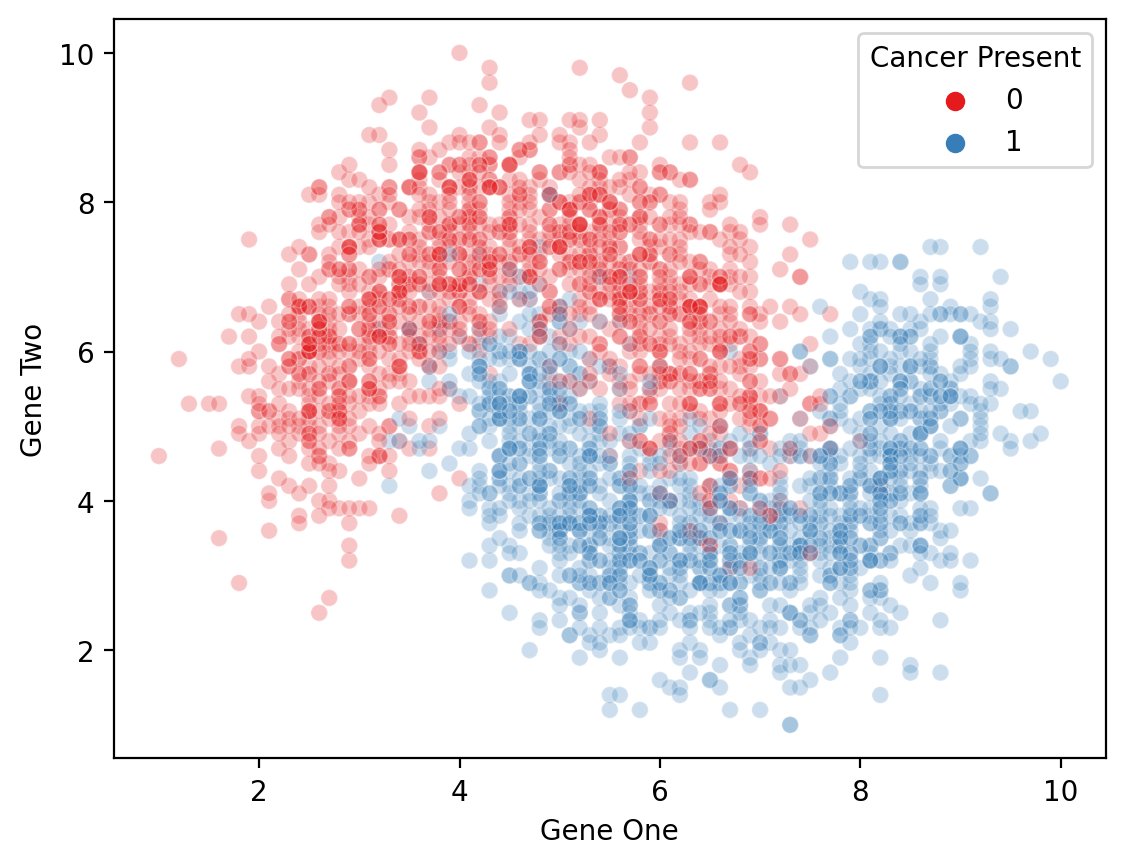

In [20]:
plt.figure(dpi=200)
sns.scatterplot(df, x='Gene One', y='Gene Two', hue='Cancer Present', palette='Set1', alpha=.25)

In [26]:
X, y = df.drop(columns='Cancer Present'), df['Cancer Present']

In [66]:
def plot_decision_boundary(resolution=20, k=5):
    gene_one_vals = np.linspace(X['Gene One'].min(), X['Gene One'].max(), resolution)
    gene_two_vals = np.linspace(X['Gene Two'].min(), X['Gene Two'].max(), resolution)
    gene_one_grid, gene_two_grid = np.meshgrid(gene_one_vals, gene_two_vals)
    gene_one_grid = gene_one_grid.reshape(-1)
    gene_two_grid = gene_two_grid.reshape(-1)
    X_landscape = pd.DataFrame(data={'Gene One': gene_one_grid, 'Gene Two': gene_two_grid})
    pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(k))])
    pipe.fit(X, y)
    y_predicted = pipe.predict(X_landscape)
    sns.scatterplot(X, x='Gene One', y='Gene Two', hue=y, alpha=0.25, palette='Set1', legend=None)
    sns.scatterplot(X_landscape, x='Gene One', y='Gene Two', hue=y_predicted, s=3, palette='Set1')
    plt.legend(bbox_to_anchor=(1,1), title='Cancer Present')

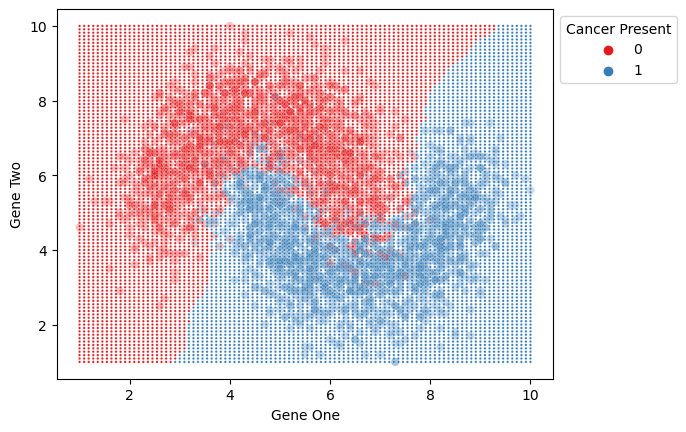

In [67]:
plot_decision_boundary(resolution=100, k=10)